In [10]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
import DB_login as login


In [2]:
#Connect to database
conn_string = "host="+ login.PGHOST +" port="+ "5432" +" dbname="+ login.PGDATABASE +" user=" + login.PGUSER \
+" password="+ login.PGPASSWORD

conn = pg.connect(conn_string)


In [3]:
#Run SQL to create dataframes
query_emp = 'SELECT * FROM employee;'
emp_data = pd.read_sql(query_emp, conn)

query_sal = 'SELECT * FROM salary;'
sal_data = pd.read_sql(query_sal, conn)

query_title = 'SELECT * FROM title;'
title_data = pd.read_sql(query_title, conn)

sal_data.head()

,salary_id,emp_no,salary,from_date,to_date
0,1,10001,60117.0,1986-06-26,1987-06-26
1,2,10002,65828.0,1996-08-03,1997-08-03
2,3,10003,40006.0,1995-12-03,1996-12-02
3,4,10004,40054.0,1986-12-01,1987-12-01
4,5,10005,78228.0,1989-09-12,1990-09-12


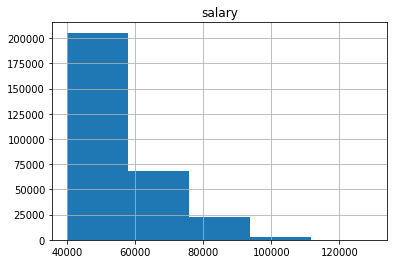

In [5]:
#Create a histogram to visualize the most common salary ranges for employee
histogram = sal_data.hist(column = 'salary', bins = 5)

<function matplotlib.pyplot.show>

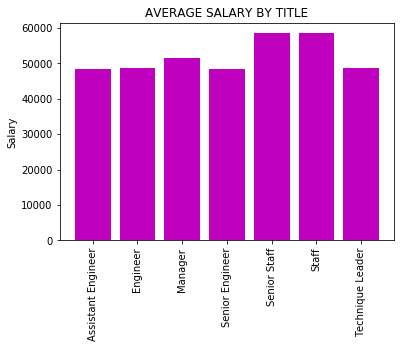

In [17]:
#Create a bar chart of average salary by title
query_avg_salary = 'SELECT t.title, ROUND(AVG(s.salary)::numeric,2) AS avg_salary FROM title AS t INNER JOIN salary AS s ON t.emp_no = s.emp_no GROUP BY t.title ORDER BY t.title; '
avg_salary_data = pd.read_sql(query_avg_salary, conn)

avg_salary_data.head()


x = avg_salary_data['title']
y = avg_salary_data['avg_salary']
    
bar_chart = plt.bar(x, y, color = 'm')

plt.xticks(rotation='vertical')
plt.title('AVERAGE SALARY BY TITLE')
plt.ylabel('Salary')

plt.show
